In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("stats.tsv", sep="\t")

In [11]:
df['normalColumns'] = df['columns'] - df['reconColumns']
df['normalCells'] = df['normalColumns'] * df['rows']
df['reconCells'] = df['reconColumns'] * df['rows']
df['totalCells'] = df['rows'] * df['columns']
features = df[['normalCells','reconCells', 'rows']]
sizes = df['size']
df

,name,size,rows,columns,reconColumns,reconCells,normalColumns,normalCells,totalCells
0,ror and grid ids,149504832,104870,4,1,104870,3,314610,419480
1,abb910 csv,4096,64,4,0,0,4,256,256
2,ificom 2022 xlsx,122096,210,7,0,0,7,1470,1470
3,inventaire immobilier de letat csv,482260640,207104,13,1,207104,12,2485248,2692352
4,fr en ips lycees csv,26425568,21777,15,0,0,15,326655,326655
5,leistungszahlen csv,7064,16,4,0,0,4,64,64
6,EU transparency register to WD,62602648,13060,54,3,39180,51,666060,705240


In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(positive=True).fit(features, sizes)
[reg.coef_, reg.intercept_]

[array([ 85.04551887, 343.72395346, 979.67931139]), -8930619.417804658]

In [13]:
reg.score(features, sizes)

0.9965669485752929

<Axes: xlabel='totalCells', ylabel='size'>

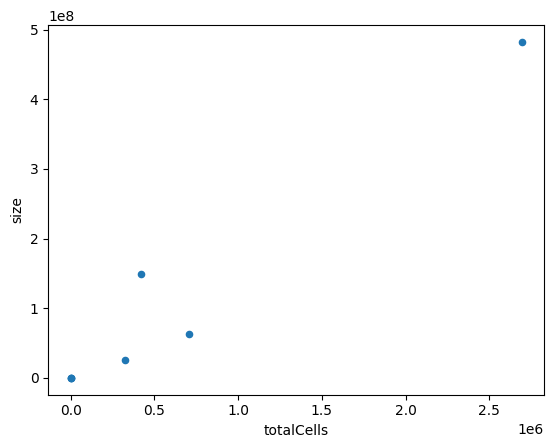

In [14]:
growth = df[['totalCells','size']] #.set_index('rows')
from matplotlib import pyplot as plt
growth.plot.scatter(x='totalCells',y='size')